In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
df = pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Data Preprocessing

## Handle Missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21613 non-null int64
Date House was Sold                          21613 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21613 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21604 non-null float64
Lot Area (in Sqft)                           21604 non-null float64
No of Floors                                 21613 non-null float64
Waterfront View                              21613 non-null object
No of Times Visited                          21613 non-null object
Condition of the House                       21613 non-null object
Overall Grade                                21613 non-null int64
Area of the House from Basement (in Sqft)    21610 non-null float64
Basement Area (in

In [5]:
#Handle missing values
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### In Case of Target Variable, MV should be deleted (Sales Price)

In [6]:
df.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [7]:
df['Sale Price'].isnull().sum()

0

### In Case of Independent Variables, MV should be Imputed (Sales Price)
    1. Numerical var
    2. Categorical var

In [8]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### Handle Missing value in Numerical Independent Variable 

In [9]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [10]:
numerical_columns =['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                    'Latitude','Longitude', 'Living Area after Renovation (in Sqft)']

In [11]:
from sklearn.impute import SimpleImputer as SI
imputer =SI(missing_values=np.nan,strategy='median')
df[numerical_columns]=imputer.fit_transform(df[numerical_columns])

In [12]:
#now check MV
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

### Handle Missing value in Categorical Independent Variable 

In [13]:
#imputer = SI(missing_values=np.nan,strategy='most_frequent')
#df['Zipcode']=imputer.fit_transform(df['Zipcode'])
#thiss code will give "ValueError: Expected 2D array, got 1D array instead"


In [14]:
#Check the shape of array
df['Zipcode'].shape

(21609,)

### So it is in 1D but need 2D array to resolve the above error , reshape the array

In [15]:
column= df['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [16]:
imputer = SI(missing_values=np.nan,strategy='most_frequent')
df['Zipcode']=imputer.fit_transform(column)

In [17]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

### now no missing values are there

## Handle Outliers

In [18]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580686e+09,5.401984e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,84.417881,98077.940488,47.560050,-122.213875,1986.553242,12769.770790
std,2.876653e+09,3.673890e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,401.714775,53.506305,0.138556,0.140832,685.427485,27306.508841
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


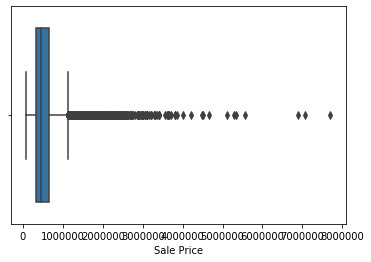

In [19]:
#Handle outliers in Target variable
sns.boxplot(df['Sale Price'])


So we are having any outliers

In [20]:
Q1=df['Sale Price'].quantile(0.25)
Q3=df['Sale Price'].quantile(0.75)
Q1,Q3

(321950.0, 645000.0)

In [21]:
IQR = Q3-Q1
IQR

323050.0

In [22]:
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit,upper_limit

(-162625.0, 1129575.0)

In [23]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [24]:
df['Sale Price']=df['Sale Price'].apply(limit_imputer)

In [25]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

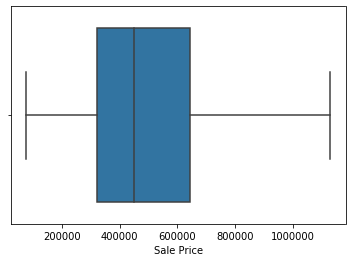

In [26]:
sns.boxplot(df['Sale Price'])


Removed All the outliers

 ## Explore and preprocess all the numerical data (Check data type and values etc)

### check the Data Type  of variables

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21609 non-null float64
Lot Area (in Sqft)                           21609 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21609 non-null float64
Basement Area (in

In [28]:
df['Zipcode']=df['Zipcode'].astype('object')

In [29]:
df.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [30]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [31]:
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [32]:
mapping = {'None':'0', 'Thrice':'3', 'Four':'4', 'Twice':'2', 'Once':'1'}

In [33]:
df['No of Times Visited'] = df['No of Times Visited'].map(mapping)

In [34]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


In [35]:
df['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [36]:
df['ever Renovated'] = np.where(df['Renovated Year'] == 0,'No','Yes')

In [37]:
df['Renovated Year']

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: Renovated Year, Length: 21609, dtype: int64

In [38]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [39]:
df['Purchase Year'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [40]:
df['Year since Rennovation'] = np.where(df['ever Renovated']=='Yes',abs(df['Purchase Year']-df['Renovated Year']),0)

In [41]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever Renovated,Purchase Year,Year since Rennovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [42]:
df.drop(columns=['Purchase Year','Renovated Year','Date House was Sold'],inplace=True)

In [43]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever Renovated,Year since Rennovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


## Feature Engineering / Feature Selection :
### We  will check the impact of numerical variable on target using Coorelation and categorical using ANOVA methodand how Independent variable are related.

## Correlation 

In [44]:
df.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Rennovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.148083,-0.409515,-0.326307,-0.071016,0.203375


## ANOVA

In [47]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [51]:
#rename all the variables
df=df.rename(columns={'Sale Price':'Sale_Price','Condition of the House':'Condition_of_the_House','ever Renovated':'ever_Renovated',
                     'Waterfront View':'Waterfront_View'})

In [52]:
df.columns

Index(['ID', 'Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront_View', 'No of Times Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Zipcode',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'ever_Renovated',
       'Year since Rennovation'],
      dtype='object')

In [53]:
mod=ols('Sale_Price ~ Condition_of_the_House',data=df).fit()

In [54]:
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


here PR i.e p-value is less than 0.05 that's why categorical variable have impact on target variable

In [55]:
mod=ols('Sale_Price ~ ever_Renovated',data=df).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [56]:
mod=ols('Sale_Price ~ Waterfront_View',data=df).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


### for all above three categorial variable PR i.e p-value is less than 0.05 that's why all categorical variable have impact on target variable

## Create Dummies variables

In [57]:
df=pd.get_dummies(df,columns=['ever_Renovated','Waterfront_View','Condition_of_the_House'],drop_first=True)

In [58]:
df.columns

Index(['ID', 'Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Year since Rennovation',
       'ever_Renovated_Yes', 'Waterfront_View_Yes',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay'],
      dtype='object')

## Binning( use when no of leavels in categoricals variable is >20)

In [60]:
df['Zipcode'].unique()

array([98178.0, 98125.0, 98028.0, 98136.0, 98074.0, 98053.0, 98003.0,
       98198.0, 98146.0, 98038.0, 98007.0, 98115.0, 98107.0, 98126.0,
       98019.0, 98103.0, 98002.0, 98133.0, 98040.0, 98092.0, 98030.0,
       98119.0, 98112.0, 98052.0, 98027.0, 98117.0, 98058.0, 98001.0,
       98056.0, 98166.0, 98023.0, 98070.0, 98148.0, 98105.0, 98042.0,
       98008.0, 98059.0, 98122.0, 98144.0, 98004.0, 98005.0, 98034.0,
       98075.0, 98116.0, 98010.0, 98118.0, 98199.0, 98032.0, 98045.0,
       98102.0, 98077.0, 98108.0, 98168.0, 98177.0, 98065.0, 98029.0,
       98006.0, 98109.0, 98022.0, 98033.0, 98155.0, 98024.0, 98011.0,
       98031.0, 98106.0, 98072.0, 98188.0, 98014.0, 98055.0, 98039.0],
      dtype=object)

here count is 70 i.e. >20

In [61]:
ziptable = df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price')
ziptable.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [62]:
ziptable['Zip_Groups']=pd.cut(ziptable['Sale_Price'],bins=10,labels=['ZG0','ZG1','ZG2','ZG3','ZG4','ZG5','ZG6','ZG7','ZG8','ZG9'],include_lowest=True)

In [63]:
ziptable=ziptable.drop(columns ="Sale_Price")

In [64]:
ziptable.head()

,Zip_Groups
Zipcode,
98002.0,ZG0
98168.0,ZG0
98032.0,ZG0
98001.0,ZG0
98148.0,ZG0


In [65]:
df =pd.merge(df,ziptable,left_on='Zipcode',how='left',right_index=True)

In [73]:
df=df.drop(columns ="Zipcode")

KeyError: "['Zipcode'] not found in axis"

In [74]:
df=df.drop(columns ="ID")

In [75]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [89]:
df= pd.get_dummies(df,columns=['Zip_Groups'],drop_first=True)

KeyError: "None of [Index(['Zip_Groups'], dtype='object')] are in the [columns]"

In [90]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df1 =  pd.to_csv("df",index=False)

## Split data in train and test

In [76]:
Y =df.iloc[:,0]
X=df.iloc[:,1:31]

In [79]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [78]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [82]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

## Feature scaling: 1. Standarisation 2 Min - Max 3. Normalisation
### scaling all independent variables into the same range

In [84]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [85]:
X_train = scale.fit_transform(X_train)

In [86]:
X_train

array([[ 0.67631191,  1.46703739,  1.46124059, ..., -0.107562  ,
        -0.16816683, -0.04951886],
       [-1.45225528, -1.43683274, -1.0634513 , ..., -0.107562  ,
        -0.16816683, -0.04951886],
       [ 0.67631191, -0.46887603, -0.4716418 , ..., -0.107562  ,
        -0.16816683, -0.04951886],
       ...,
       [-0.38797169,  0.82173292,  1.08117945, ..., -0.107562  ,
        -0.16816683, -0.04951886],
       [ 0.67631191,  1.78968963,  1.9042833 , ..., -0.107562  ,
        -0.16816683, -0.04951886],
       [-0.38797169, -0.14622379, -0.63452515, ..., -0.107562  ,
        -0.16816683, -0.04951886]])

In [87]:
X_test = scale.fit_transform(X_test)
X_test

array([[-0.42497357,  0.50337709, -0.0469087 , ..., -0.12259907,
        -0.17043362, -0.04482492],
       [-0.42497357, -1.47323932, -0.96780688, ...,  8.15666905,
        -0.17043362, -0.04482492],
       [-0.42497357,  0.17394102,  1.10421403, ..., -0.12259907,
        -0.17043362, -0.04482492],
       ...,
       [ 1.78087404,  2.15055743,  1.82777688, ..., -0.12259907,
        -0.17043362, -0.04482492],
       [ 0.67795023,  0.83281316,  1.42214316, ..., -0.12259907,
        -0.17043362, -0.04482492],
       [ 1.78087404,  0.17394102,  0.67665416, ..., -0.12259907,
        -0.17043362, -0.04482492]])

# Linear Regression Model

In [91]:
#Step1 : Scale the dataframe
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Y=df['Sale_Price']
X= scale.fit_transform(df.drop(columns=['Sale_Price']))
X= pd.DataFrame(data=X,columns=df.drop(columns=['Sale_Price']).columns)
X.head()



,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.089574,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.089574,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.089574,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [92]:
#Step 2 :Check and remove multicollinearity
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.051957,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.077419,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.065334,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.037619,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.055951,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,-0.018557,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.090561,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.058931,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.025312,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.067269,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [93]:
# pair of independent variable with corr >0.5
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [95]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif_data =X
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)

In [97]:
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Year since Rennovation                          2.788098
ever_Renovated_Yes                              2.955790
Waterfront_View_Yes                             1.208439
Condition_of_the_House_Excellen

In [100]:
def MC_remover(data):
    VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
    if VIF.max()>5:
        print(VIF[VIF == VIF.max()].index[0],'has to be removed')
        data = data.drop(columns = [VIF[VIF == VIF.max()].index[0]])
        return data
    else:
        print("NO Multicollinearity present anymore")
        return data
    

In [101]:
for i in range(7):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft) has to be removed
Condition_of_the_House_Fair has to be removed
NO Multicollinearity present anymore
NO Multicollinearity present anymore
NO Multicollinearity present anymore
NO Multicollinearity present anymore
NO Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Condition_of_the_House_Okay,Zip_Groups_ZG1,Zip_Groups_ZG2,Zip_Groups_ZG3,Zip_Groups_ZG4,Zip_Groups_ZG5,Zip_Groups_ZG6,Zip_Groups_ZG7,Zip_Groups_ZG8,Zip_Groups_ZG9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.089574,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.089574,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.089574,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [102]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Year since Rennovation                       2.788064
ever_Renovated_Yes                           2.955539
Waterfront_View_Yes                          1.208288
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay 

So now none of the independent variables have VIF >5

## Train/Test Set

In [104]:
X= vif_data
Y= df['Sale_Price']

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

## Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [113]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14594.33847962,  10761.77007875,
        14239.3533334 ,   5095.97603572,  -2296.64888137,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [115]:
predictions= lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

In [116]:
lr.score(x_test,predictions)

1.0

## 1. Residuals

In [118]:
residuals =predictions- y_test
residual_table = pd.DataFrame({'Residuals':residuals,
                              'Predictions':predictions})
residual_table =residual_table.sort_values(by ='Predictions')

In [119]:
z= [i for i in range(int(residual_table['Predictions'].max()))]
k= [0 for i in range(int(residual_table['Predictions'].max()))]

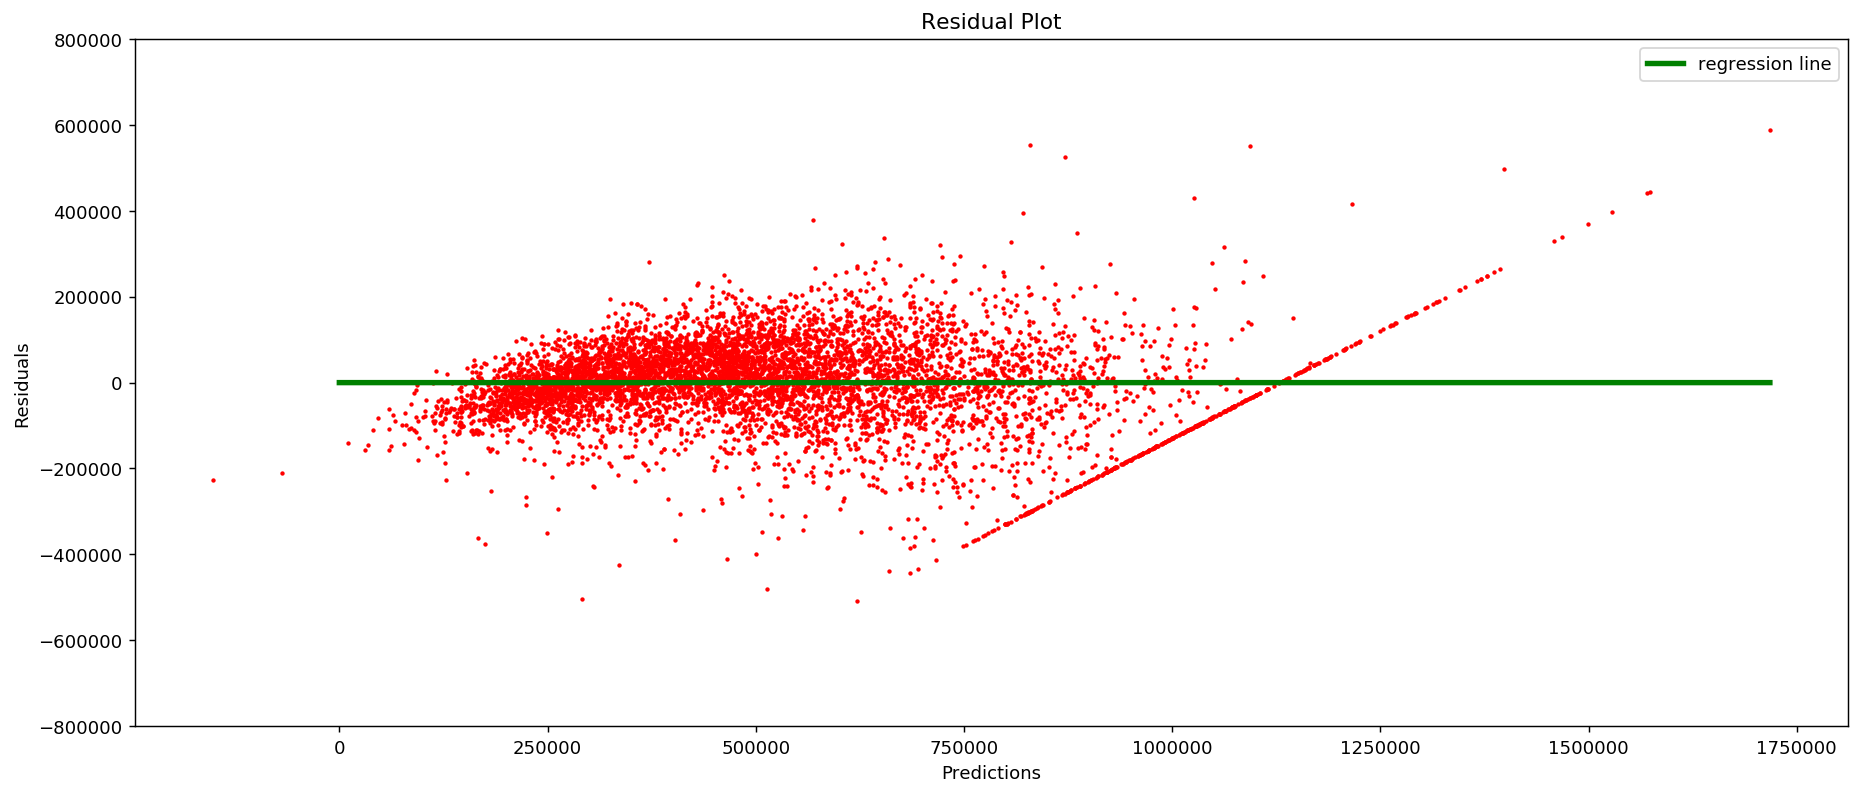

In [122]:
plt.figure(dpi= 130,figsize=(17,7))
plt.scatter(residual_table['Predictions'],residual_table['Residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth = 3, label ='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

### Distribution of errors

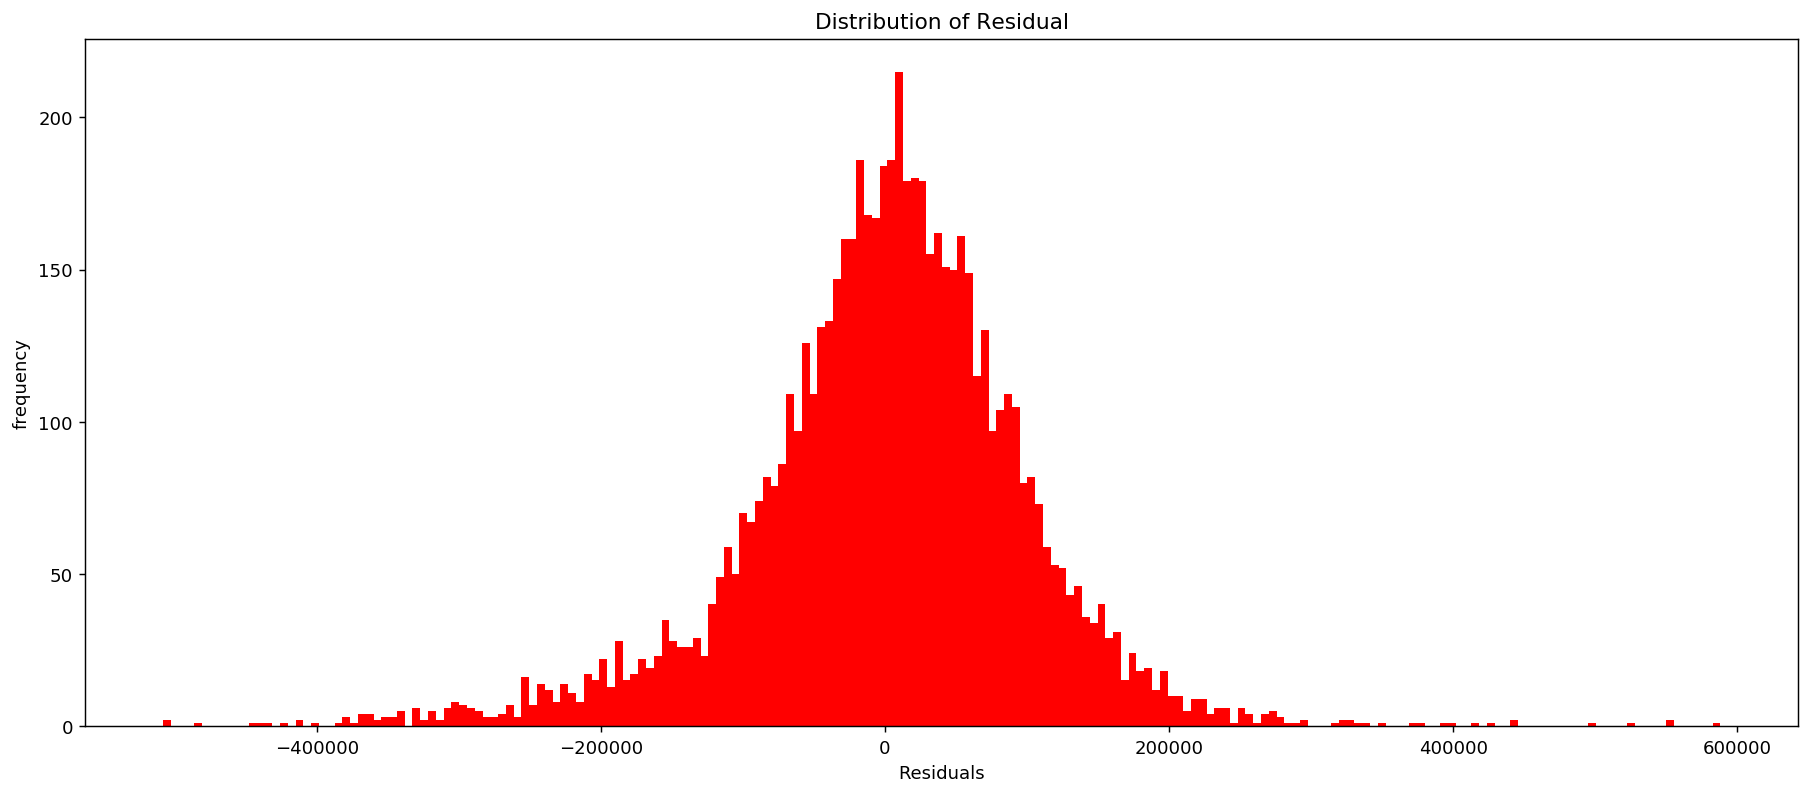

In [123]:
plt.figure(dpi = 130,figsize=(17,7))
plt.hist(residual_table['Residuals'],color='red',bins = 200)

plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residual')
plt.show()

### Model Coefficients

In [124]:
coeff_table = pd.DataFrame({'columns':x_train.columns,
                           'coefficients':lr.coef_})
coeff_table=coeff_table.sort_values(by ='coefficients')

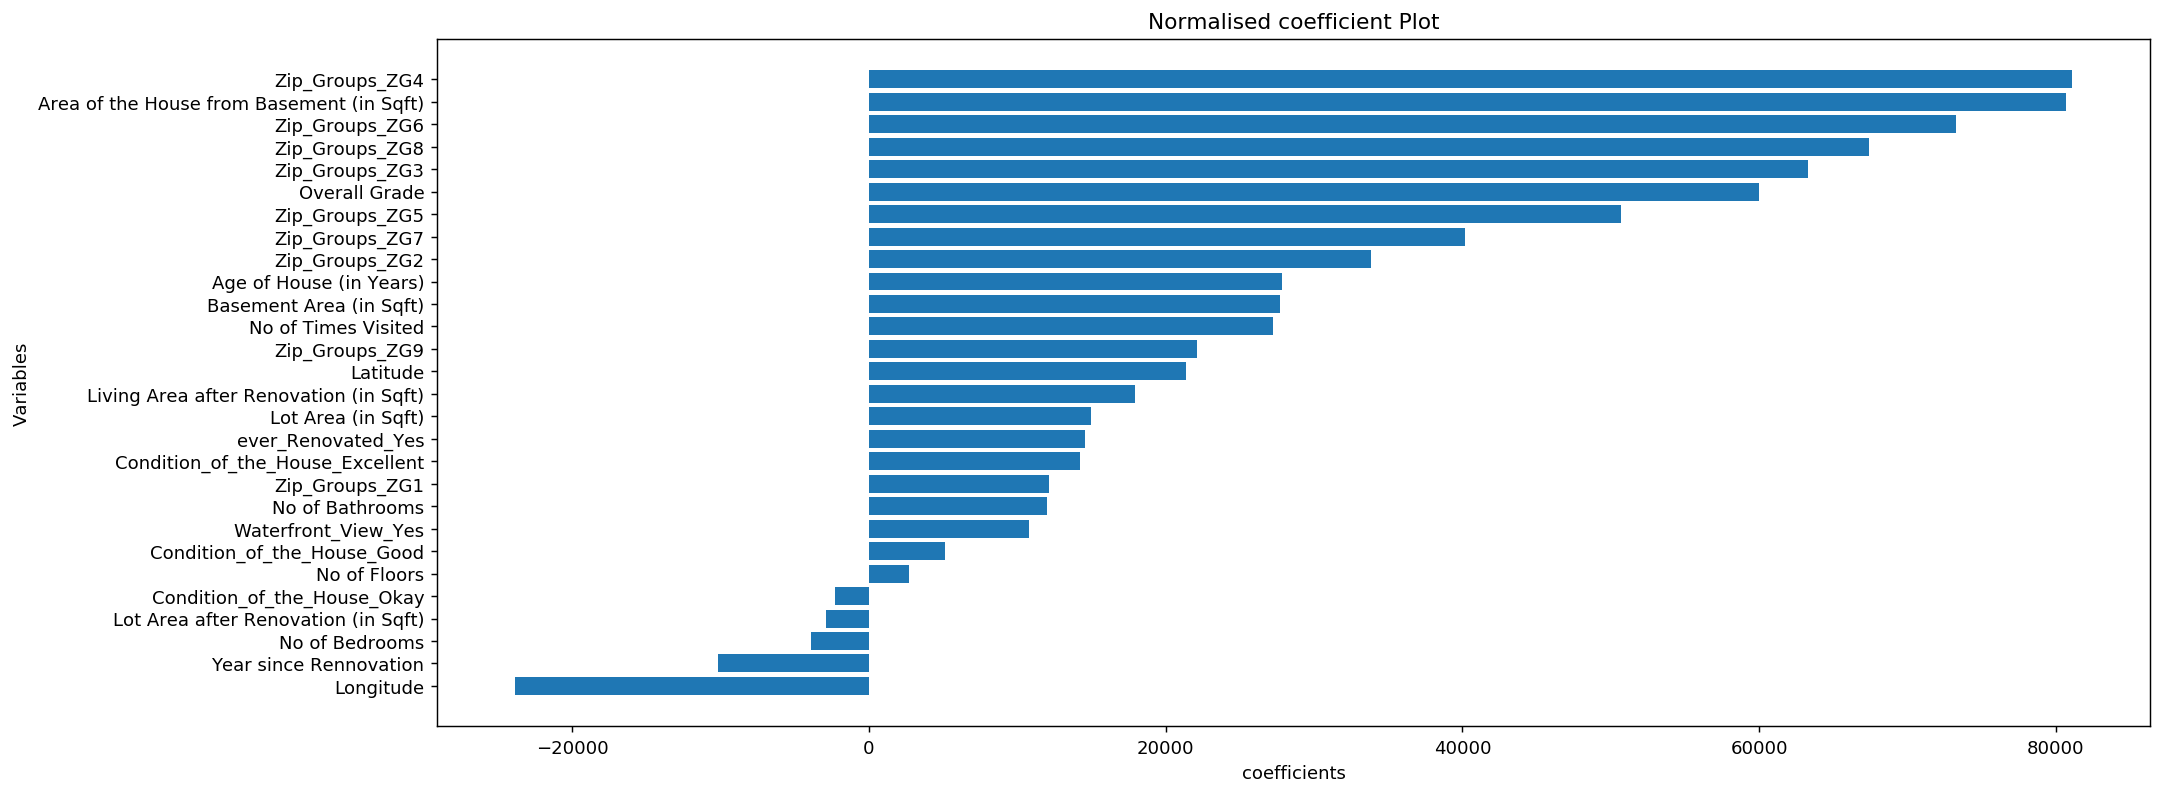

In [125]:
plt.figure(dpi= 130,figsize=(17,7))
plt.barh(coeff_table['columns'],coeff_table['coefficients'])
plt.xlabel('coefficients')
plt.ylabel('Variables')
plt.title('Normalised coefficient Plot')
plt.show()